In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
import scipy
import mne
import matplotlib.pyplot as plt
import os

In [2]:
def eeg_data_extraction(data):
    max_time_len = 20000
    raw_data = data.get_data()
    coi = ['Fp1','Fp2','F7','F8','Fz','C3','C4','F3','F4']

    coi_indexes = []
    for channel_name in coi:
        index = data.ch_names.index(channel_name)
        coi_indexes.append(index)
    
    ft_time_series = []
    for channel in coi_indexes:
        time_serie = raw_data[channel][:max_time_len]
        fourier_transform = scipy.fft(time_serie)
        ft_time_series.append(fourier_transform)
    
    frequencies = []
    freq_spectra = []
    for channel in range(len(ft_time_series)):
        x_axis = np.arange(0,len(ft_time_series[channel]))
        N = ft_time_series[channel].shape[0]
        T = 1.0 / 1000.0
        xf = scipy.fftpack.fftfreq(N, T)[:N//2]
        lower_bound = xf>4
        upper_bound = xf<100
        bounds = lower_bound & upper_bound
        non_zero_indices = np.where(bounds,ft_time_series[channel][:N//2],0).nonzero()
        frequencies.append(xf[non_zero_indices])
        freq_spectra.append(np.abs(ft_time_series[channel])[non_zero_indices])
    return frequencies,freq_spectra

In [3]:
def check(string, sub_str): 
    if (string.find(sub_str) == -1): 
        return(False) 
    else: 
        return(True)

def list_files_with_string(files, string):
    output_files = []
    for file in files:
        if check(file, string):
            output_files.append(file)
    return output_files

In [4]:
folders = os.listdir()
folders = list_files_with_string(folders, 'sub')
file_paths=[]
for folder in folders:
    sub_path = './' + folder + '/eeg/'
    files = os.listdir(sub_path)
    edf_files = list_files_with_string(files, '.edf')
    for file in edf_files:
        file_paths.append(sub_path + file)

In [5]:
generated_music_files = list_files_with_string(file_paths, 'genMusic')
classical_music_files = list_files_with_string(file_paths, 'classicalMusic')
file_classifications = []
for file in generated_music_files:
    file_classifications.append([file, 'generated'])
for file in classical_music_files:
    file_classifications.append([file, 'classical'])

In [6]:
eeg_data = []
for file in file_paths:
    data = mne.io.read_raw_edf(file)
    xf, freq_spectra = eeg_data_extraction(data)
    eeg_data.append([file,freq_spectra])

Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-01\eeg\sub-01_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-01\eeg\sub-01_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-2-5665553f7c5d>:14: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fourier_transform = scipy.fft(time_serie)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-01\eeg\sub-01_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-01\eeg\sub-01_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-01\eeg\sub-01_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-02\eeg\sub-02_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-02\eeg\sub-02_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-02\eeg\sub-02_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-02\eeg\sub-02_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-02\eeg\sub-02_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-03\eeg\sub-03_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-03\eeg\sub-03_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_ghostvalence, ft_ghostarousal, sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-03\eeg\sub-03_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-03\eeg\sub-03_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-03\eeg\sub-03_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-04\eeg\sub-04_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-04\eeg\sub-04_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-04\eeg\sub-04_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-04\eeg\sub-04_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-04\eeg\sub-04_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-05\eeg\sub-05_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-05\eeg\sub-05_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-05\eeg\sub-05_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-05\eeg\sub-05_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-05\eeg\sub-05_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-06\eeg\sub-06_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-06\eeg\sub-06_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-06\eeg\sub-06_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-06\eeg\sub-06_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-06\eeg\sub-06_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-07\eeg\sub-07_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-07\eeg\sub-07_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_ghostvalence, ft_ghostarousal, sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-07\eeg\sub-07_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-07\eeg\sub-07_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-07\eeg\sub-07_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-08\eeg\sub-08_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-08\eeg\sub-08_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-08\eeg\sub-08_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-08\eeg\sub-08_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-08\eeg\sub-08_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-09\eeg\sub-09_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-09\eeg\sub-09_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-09\eeg\sub-09_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-09\eeg\sub-09_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-09\eeg\sub-09_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-10\eeg\sub-10_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-10\eeg\sub-10_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-10\eeg\sub-10_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-10\eeg\sub-10_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-10\eeg\sub-10_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-11\eeg\sub-11_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-11\eeg\sub-11_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-11\eeg\sub-11_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-11\eeg\sub-11_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-11\eeg\sub-11_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-12\eeg\sub-12_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-12\eeg\sub-12_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-12\eeg\sub-12_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-12\eeg\sub-12_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-12\eeg\sub-12_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-13\eeg\sub-13_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-13\eeg\sub-13_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-13\eeg\sub-13_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-13\eeg\sub-13_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-13\eeg\sub-13_task-washout_eeg.edf...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-14\eeg\sub-14_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-14\eeg\sub-14_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-14\eeg\sub-14_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-14\eeg\sub-14_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-14\eeg\sub-14_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-15\eeg\sub-15_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-15\eeg\sub-15_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_ghostvalence, ft_ghostarousal, sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-15\eeg\sub-15_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-15\eeg\sub-15_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-15\eeg\sub-15_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-16\eeg\sub-16_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-16\eeg\sub-16_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-16\eeg\sub-16_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-16\eeg\sub-16_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-16\eeg\sub-16_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-17\eeg\sub-17_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-17\eeg\sub-17_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-17\eeg\sub-17_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_ghostvalence, ft_ghostarousal, sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-17\eeg\sub-17_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-17\eeg\sub-17_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-18\eeg\sub-18_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-18\eeg\sub-18_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-18\eeg\sub-18_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-18\eeg\sub-18_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-18\eeg\sub-18_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-19\eeg\sub-19_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-19\eeg\sub-19_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-19\eeg\sub-19_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-19\eeg\sub-19_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-19\eeg\sub-19_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-20\eeg\sub-20_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-20\eeg\sub-20_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-20\eeg\sub-20_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-20\eeg\sub-20_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-20\eeg\sub-20_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-21\eeg\sub-21_task-classicalMusic_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)
<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-21\eeg\sub-21_task-genMusic01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-21\eeg\sub-21_task-genMusic02_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-21\eeg\sub-21_task-genMusic03_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from C:\Users\usr1\Documents\NMA Project\sub-21\eeg\sub-21_task-washout_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-24d141957373>:3: RuntimeWarning: Physical range is not defined in following channels:
ft_valance, ft_arousal, ft_x, ft_y, ft_ghostvalence, ft_ghostarousal, music, trialtype, sams_valence, sams_arousal, sams_valencert, sams_arousalrt
  data = mne.io.read_raw_edf(file)


In [7]:
data_dic = {'classification': file_classifications,
            'eeg_spectra': eeg_data,
            'frequencies': xf[0]}

In [8]:
len(data_dic['eeg_spectra'][0][1][0])

1919

In [9]:
len(data_dic['frequencies'])

1919

In [10]:
import pickle

#saving data
with open('data_for_model.pickle', 'wb') as handle:
    pickle.dump(data_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

#reading data
with open('data_for_model.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [11]:
test

{'classification': [['./sub-01/eeg/sub-01_task-genMusic01_eeg.edf',
   'generated'],
  ['./sub-01/eeg/sub-01_task-genMusic02_eeg.edf', 'generated'],
  ['./sub-01/eeg/sub-01_task-genMusic03_eeg.edf', 'generated'],
  ['./sub-02/eeg/sub-02_task-genMusic01_eeg.edf', 'generated'],
  ['./sub-02/eeg/sub-02_task-genMusic02_eeg.edf', 'generated'],
  ['./sub-02/eeg/sub-02_task-genMusic03_eeg.edf', 'generated'],
  ['./sub-03/eeg/sub-03_task-genMusic01_eeg.edf', 'generated'],
  ['./sub-03/eeg/sub-03_task-genMusic02_eeg.edf', 'generated'],
  ['./sub-03/eeg/sub-03_task-genMusic03_eeg.edf', 'generated'],
  ['./sub-04/eeg/sub-04_task-genMusic01_eeg.edf', 'generated'],
  ['./sub-04/eeg/sub-04_task-genMusic02_eeg.edf', 'generated'],
  ['./sub-04/eeg/sub-04_task-genMusic03_eeg.edf', 'generated'],
  ['./sub-05/eeg/sub-05_task-genMusic01_eeg.edf', 'generated'],
  ['./sub-05/eeg/sub-05_task-genMusic02_eeg.edf', 'generated'],
  ['./sub-05/eeg/sub-05_task-genMusic03_eeg.edf', 'generated'],
  ['./sub-06/eeg/su

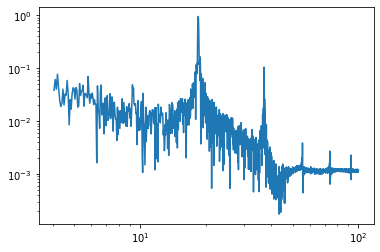

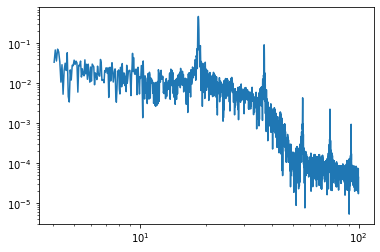

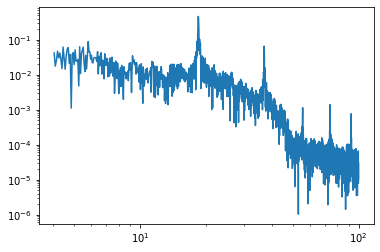

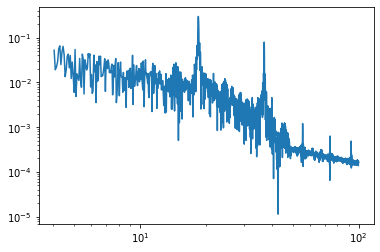

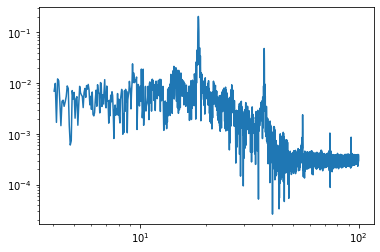

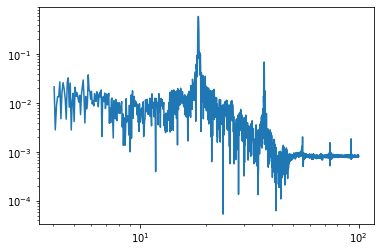

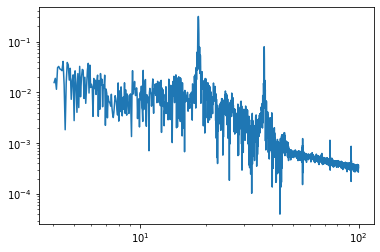

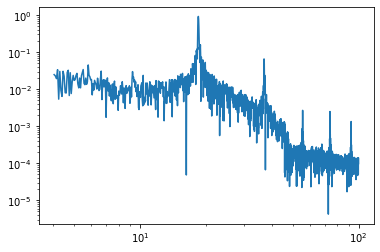

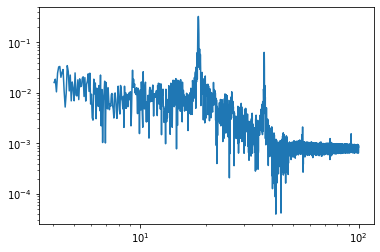

In [12]:
for channel in freq_spectra:
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(xf[0], np.abs(channel))
    plt.show()